In [144]:
import os
import sys
import pandas as pd
import scipy.stats as scs
import spei as si
import matplotlib.pyplot as plt

sys.path.append('/home/pooya/w/DroughtMonitoringIran/')

data_path = "./assets/data/"

In [127]:
csv_data_files_list = [f for f in os.listdir(path=data_path) if f.endswith(".csv")]

data = pd.DataFrame()

for f in csv_data_files_list:
    tmp = pd.read_csv(filepath_or_buffer=data_path + f)
    data = pd.concat([data, tmp])

data_daily = data[['Site', 'Year', 'Month', 'Day', 'rrr']]
data_daily.rename(
    columns={
        'rrr': 'Precip'
    },
    inplace=True
)
data_daily['Date'] = pd.to_datetime(
    data_daily[['Year', 'Month', 'Day']],
    errors='coerce'
)

data_daily.set_index('Date', inplace=True)

data_monthly = data.\
    groupby(by=['Site', 'Year', 'Month']).\
        agg(
            Precip=('rrr', 'sum'),
            Count=('rrr', 'count')
        ).reset_index(drop=False)

data_monthly.loc[data_monthly.Count < 10, "Precip"] = pd.NA

/tmp/ipykernel_12047/3932330384.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_daily.rename(
/tmp/ipykernel_12047/3932330384.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_daily['Date'] = pd.to_datetime(


In [130]:
data_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87660 entries, 1959-01-01 to 2018-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Site    87660 non-null  int64  
 1   Year    87660 non-null  int64  
 2   Month   87660 non-null  int64  
 3   Day     87660 non-null  int64  
 4   Precip  87544 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 4.0 MB


Date
1959-01-01    15.0
1959-01-02    19.0
1959-01-03     0.0
1959-01-04     0.0
1959-01-05     0.0
              ... 
2018-12-27     0.0
2018-12-28     0.8
2018-12-29    39.2
2018-12-30     0.0
2018-12-31     0.0
Name: Precip, Length: 21915, dtype: float64

In [170]:
st = 40736
f = 30
series = data_daily.loc[data_daily.Site == st, "Precip"].rolling(f, min_periods=f).sum().dropna()
spi1_gamma = si.spi(series, dist=scs.gamma, fit_freq="ME")
f = 90
series = data_daily.loc[data_daily.Site == st, "Precip"].rolling(f, min_periods=f).sum().dropna()
spi3_gamma = si.spi(series, dist=scs.gamma, fit_freq="ME")
f = 180
series = data_daily.loc[data_daily.Site == st, "Precip"].rolling(f, min_periods=f).sum().dropna()
spi6_gamma = si.spi(series, dist=scs.gamma, fit_freq="ME")
f = 360
series = data_daily.loc[data_daily.Site == st, "Precip"].rolling(f, min_periods=f).sum().dropna()
spi12_gamma = si.spi(series, dist=scs.gamma, fit_freq="ME")

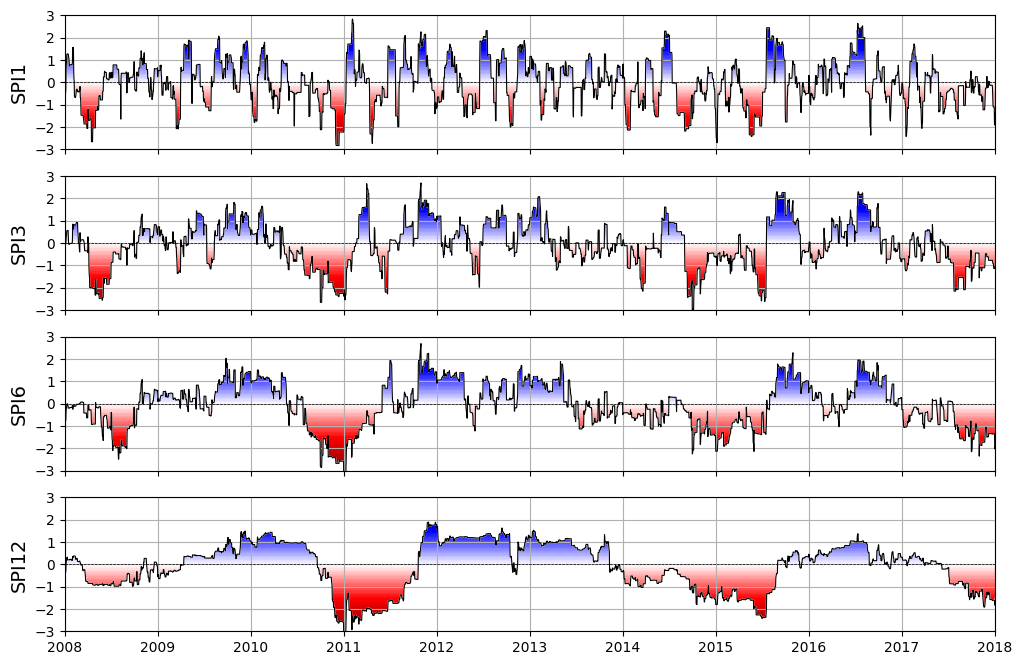

In [172]:
f, ax = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
si.plot.si(spi1_gamma, ax=ax[0], cmap="seismic_r")
si.plot.si(spi3_gamma, ax=ax[1], cmap="seismic_r")
si.plot.si(spi6_gamma, ax=ax[2], cmap="seismic_r")
si.plot.si(spi12_gamma, ax=ax[3], cmap="seismic_r")
ax[0].set_xlim(pd.to_datetime(["2008", "2018"]))
[x.grid() for x in ax]
[ax[i].set_ylabel(n, fontsize=14) for i, n in enumerate(["SPI1", "SPI3", "SPI6", "SPI12"])];